In [892]:
##Importing libraries and reading load file

import pandas as pd
import numpy as np

df = pd.read_csv('loan.csv')
df.shape

(39717, 111)

In [891]:
### Finding missing values and dropping those columns
#### Dropped column for desc 
round(100*(df.isnull().sum()/len(df.index)), 2)
df = df[df.columns[df.isnull().mean() < 0.3]]

In [832]:
###Checking missing rows
len(df[df.isnull().sum(axis=1) > 5])

0

In [833]:
###Checking missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [834]:
###Checking missing values of emp_title
len(df[df.emp_title.isnull()])
100*(len(df[df.emp_title.isnull()].index) / len(df.index))


6.191303472064859

In [835]:
#### Such data is only part of 6%, thus dropping 
df = df[~df.emp_title.isnull()]

In [836]:
### Correcting data format of emp_length
df['emp_length'] = df.emp_length.apply(lambda x: str(x).replace(' years','').replace(' year','').replace('< ','')
                   .replace('+',''))
df['emp_length'].value_counts()

10     8535
1      7335
2      4273
3      3982
4      3357
5      3177
6      2158
7      1722
8      1435
9      1228
nan      56
Name: emp_length, dtype: int64

In [837]:
### Imputing emp length by 10
df.loc[pd.isnull(df['emp_length']), ['emp_length']] = 10
###Checking missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.02
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [838]:
### Imputing data for title
df.title.value_counts()
df.loc[pd.isnull(df['title']), ['title']] = 'Debt Consolidation'

In [839]:
###Dropping columns having zero values
df.chargeoff_within_12_mths.sum()

0.0

In [840]:
df.drop('chargeoff_within_12_mths',axis=1,inplace=True)

In [841]:
df.collections_12_mths_ex_med.sum()

0.0

In [842]:
df.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [843]:
df.tax_liens.sum()

0.0

In [844]:
### Imputing and correcting data format for revol_util
df.revol_util.value_counts()

0%        885
0.20%      60
63%        58
61%        55
66.60%     55
         ... 
33.39%      1
0.83%       1
26.32%      1
13.56%      1
2.64%       1
Name: revol_util, Length: 1082, dtype: int64

In [845]:
df.drop('tax_liens',axis=1,inplace=True)

In [846]:
### Dropping unimportant columns
df.drop('id',axis=1,inplace=True)

In [847]:
df.drop('policy_code',axis=1,inplace=True)

In [848]:
df.drop('pymnt_plan',axis=1,inplace=True)

In [849]:
df.drop('url',axis=1,inplace=True)

In [850]:
### dropping off columns  with zero values
df.delinq_amnt.sum()

0

In [851]:
df.drop('delinq_amnt',axis=1,inplace=True)

In [852]:
df.acc_now_delinq.sum()

0

In [853]:
df.drop('acc_now_delinq',axis=1,inplace=True)

In [854]:
df.application_type.value_counts()

INDIVIDUAL    37258
Name: application_type, dtype: int64

In [855]:
df.drop('application_type',axis=1,inplace=True)

In [856]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.725800e+04,37258.000000,37258.000000,37258.000000,37258.000000,3.725800e+04,37258.000000,37258.000000,37258.000000,37258.000000,...,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,36604.000000
mean,8.492974e+05,11269.884991,10998.292984,10438.091076,325.768421,6.920295e+04,13.392962,0.147324,0.868511,9.341833,...,51.140396,12241.566490,11643.776675,9862.819328,2283.738768,1.338082,93.670393,11.883306,2713.118571,0.041553
std,2.660468e+05,7419.881267,7155.589300,7098.278845,207.474140,6.415883e+04,6.655033,0.494497,1.066977,4.393153,...,374.642516,9022.883703,8925.934698,7041.208099,2611.055054,7.226053,683.705663,141.274958,4450.300457,0.200524
min,7.069900e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.663790e+05,5500.000000,5500.000000,5000.000000,168.450000,4.150000e+04,8.300000,0.000000,0.000000,6.000000,...,0.000000,5639.614686,5202.435000,4800.000000,672.740000,0.000000,0.000000,0.000000,223.185000,0.000000
50%,8.489430e+05,10000.000000,9975.000000,9000.000000,282.955000,6.000000e+04,13.490000,0.000000,1.000000,9.000000,...,0.000000,10049.385030,9400.025000,8000.000000,1372.100000,0.000000,0.000000,0.000000,561.440000,0.000000
75%,1.046859e+06,15000.000000,15000.000000,14400.000000,431.600000,8.269650e+04,18.650000,0.000000,1.000000,12.000000,...,0.000000,16631.603563,15901.957500,13832.972500,2861.300000,0.000000,0.000000,0.000000,3395.620000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [857]:
df.loc[pd.isnull(df['revol_util']), ['revol_util']] = 0
df.revol_util.isnull().sum()

0

In [858]:
### Imputing and correcting data format for last_payment date
df.last_pymnt_d.value_counts()

May-16    1176
Mar-13     970
Dec-14     878
May-13     858
Feb-13     819
          ... 
Apr-08      10
Jun-08      10
Mar-08       5
Jan-08       2
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [859]:
df.loc[pd.isnull(df['last_pymnt_d']), ['last_pymnt_d']] = 'May-16'

In [860]:
df.last_pymnt_d.isnull().sum()

0

In [861]:
#### Imputing pub rec bankruptcies
df.loc[np.isnan(df['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = df['pub_rec_bankruptcies'].mean()

In [862]:
###Checking missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_py

In [863]:
### checking dtype of all columns
df.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc           

In [864]:
###Convert term into int
df.term = df.term.apply(lambda x: int(x.replace(' months','')))

In [865]:
###Convert int_rate into float
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%','')))

In [866]:
###Convert revol_util into float
df.revol_util = df.revol_util.apply(lambda x: float(str(x).replace('%','')))

In [867]:
###Convert emp+length into int
df.emp_length = df.emp_length.apply(lambda x:10 if x=='nan' else int(x))

In [868]:
###Check dtype
df.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc           

In [869]:
##Import pyplot lib and create a boxplot for loan_amt
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.box(df, y="loan_amnt")
fig.show()

In [870]:
df.loan_status.value_counts()

Fully Paid     31048
Charged Off     5143
Current         1067
Name: loan_status, dtype: int64

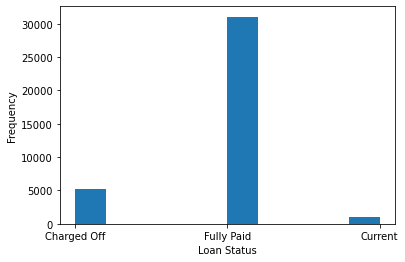

In [871]:
plt.hist(df.loan_status)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

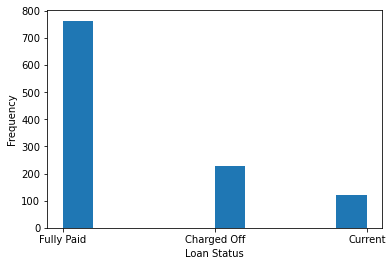

In [872]:
### Outlier data check for loan_amount
new_df = df[df.loan_amnt>=30000]
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.hist(new_df.loan_status)
plt.show()

<AxesSubplot:xlabel='home_ownership', ylabel='total_pymnt'>

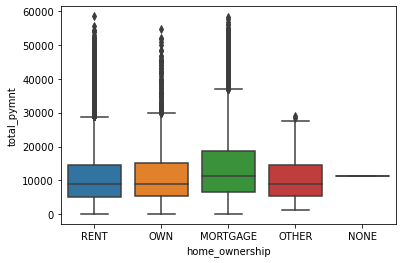

In [873]:
### Check the home ownership division of total payment
sns.boxplot(df['home_ownership'], df.total_pymnt)
### Mortgage owner have slightly more loans compared to others

In [874]:
from datetime import datetime
df.last_pymnt_d = df.last_pymnt_d.apply(lambda x : datetime.strptime(x,'%b-%y'))

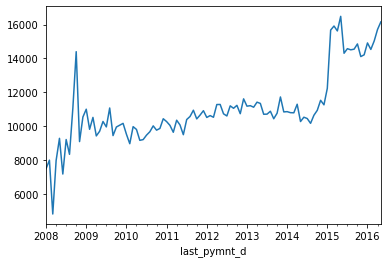

In [875]:
### Grouping loan amount by time
df.groupby(['last_pymnt_d'])['loan_amnt'].mean().plot()
plt.show()

In [876]:
### Setting loan pass inapplicable
df.loc[(df['loan_status'] == 'Charged Off'), ['loan_pass']] = 'N'

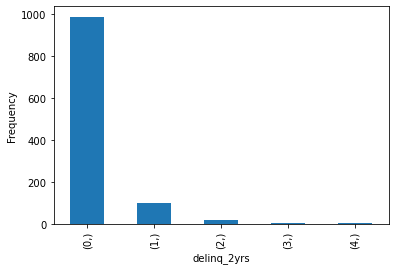

In [877]:
### Finding delinquent- repeaters
new_df[['delinq_2yrs']].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.show()

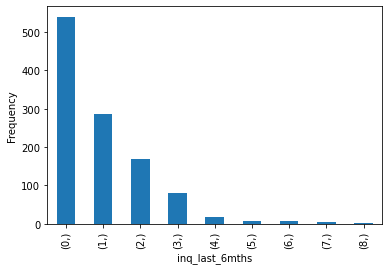

In [878]:
### Checking last 6 months delinquent check
new_df[['inq_last_6mths']].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.show()

In [879]:
### Setting loan pass inapplicable
df.loc[(df['delinq_2yrs'] > 2) & (df.loan_pass.isnull()), ['loan_pass']] = 'N'

In [880]:
### Setting loan pass inapplicable
df.loc[(df['inq_last_6mths'] > 3 & df.loan_pass.isnull()), ['loan_pass']] = 'N'

In [881]:
### find public record bankruptcies
df[df.loan_pass.isnull()].pub_rec_bankruptcies.value_counts()

0.000000    23312
1.000000      861
0.041553      398
2.000000        5
Name: pub_rec_bankruptcies, dtype: int64

In [882]:
df.loc[(df.loan_pass.isnull() & df['pub_rec_bankruptcies'] > 1), ['loan_pass']] = 'N'

In [883]:
### Based on above data sanction loan for fully paid
df.loc[(df['loan_status'] == 'Fully Paid'), ['loan_pass']] = 'Y'

In [884]:
### Set the other records to pass as no other obsservation
df.loc[df.loan_pass.isnull(), ['loan_pass']] = 'Y'

In [885]:
### Percentage of loan applicant passed
100*(len(df[df.loan_pass == 'Y'].index) / len(df.index))

85.55478018143754

In [886]:
### Created heatmap report based on total loan passed based on status and total payment range
res = pd.pivot_table(data=df, index='loan_status', columns='loan_pass', values='total_pymnt', aggfunc=np.median)

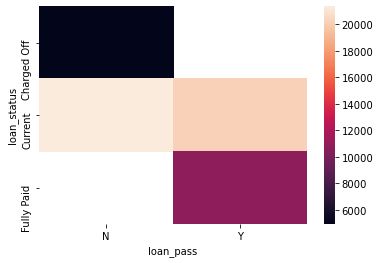

In [887]:
sns.heatmap(res)
plt.show()

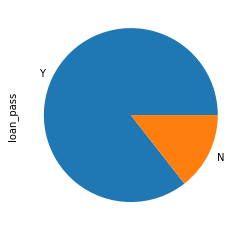

In [888]:
### Overall pie chart showing loan grant detail
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

df.reset_index(inplace=True, drop=True)
df['loan_pass'].value_counts().plot.pie()
plt.show()